In [4]:
import pandas as pd

fpath='./file/sms.tsv'
data = pd.read_csv(fpath,sep='\t',names=['class','sms'])

data.head(7)


,class,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...


In [8]:
ham_spam = data['class'].value_counts()

ham_spam

ham     4825
spam     747
Name: class, dtype: int64

In [11]:
from sklearn.preprocessing import LabelEncoder

lab = LabelEncoder()

labels = lab.fit_transform(data['class'])
print(labels)

# mapping labels to 0 and 1// manual encoding

#docs['label'] = docs.Class.map({'ham':0, 'spam':1})



[0 0 1 ... 0 0 0]


In [19]:
X = data.sms
y =labels

print(X.shape)
print(y.shape)

(5572,)
(5572,)


In [30]:
#split_train_test

from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest = train_test_split(X,y)

In [33]:
xtrain.head(2)


1959    Lol ... Oh no babe, I wont be sliding into you...
4471    Lemme know when I can swing by and pick up, I'...
Name: sms, dtype: object

In [37]:
#vectorizng and removing stop words

from sklearn.feature_extraction.text import CountVectorizer

vector = CountVectorizer(stop_words='english')

transXtrain= vector.fit_transform(xtrain)
transXtest = vector.transform(xtest)

In [39]:
print(type(transXtrain))

<class 'scipy.sparse.csr.csr_matrix'>


In [40]:
#NB model

from sklearn.naive_bayes import MultinomialNB

mod = MultinomialNB()

mod.fit(transXtrain,ytrain)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [41]:
predicted = mod.predict(transXtest)

In [95]:
predicted



array([0, 0, 0, ..., 0, 1, 0])

In [43]:
predict_probibility = mod.predict_proba(transXtest)

In [44]:
predict_probibility

array([[9.95837294e-01, 4.16270610e-03],
       [9.96919695e-01, 3.08030531e-03],
       [9.95240514e-01, 4.75948576e-03],
       ...,
       [9.99898538e-01, 1.01461721e-04],
       [1.03216966e-17, 1.00000000e+00],
       [9.99999983e-01, 1.72328488e-08]])

In [45]:
from sklearn.metrics import accuracy_score

accuracy_score(ytest,predicted)


0.9892318736539842

In [57]:
# testing

t1= ['hi how are you i hope u r fine']

t2= ['hurry up exciting offers available for you . join now login to our website']
comment1= vector.transform(t1)
comment2= vector.transform(t2)
pre1 = mod.predict(comment1)
pre2 = mod.predict(comment2)


In [61]:
invert = lab.inverse_transform(pre1),lab.inverse_transform(pre2)
print(invert[0])

print(invert[1])


['ham']
['spam']


In [62]:
#logitic regression model

from sklearn.linear_model import LogisticRegression

lmod = LogisticRegression()

lmod.fit(transXtrain,ytrain)



c:\users\ravin\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [63]:
Lpredict =lmod.predict(transXtest)

In [64]:
Lpredict

array([0, 0, 0, ..., 0, 1, 0])

In [65]:
accuracy_score(ytest,Lpredict)

0.9842067480258435

In [93]:
# testing

l1= ['hi how are you i hope u r fine']

l2= ['Free entry in 2 a wkly comp to win FA Cup final. hurry up  ']
c1= vector.transform(l1)
c2= vector.transform(l2)

p1 = lmod.predict(c1)
p2 = lmod.predict(c2)
t = lab.inverse_transform(pre1),lab.inverse_transform(pre2)

print(t[0])
print(t[1])


['ham']
['ham']


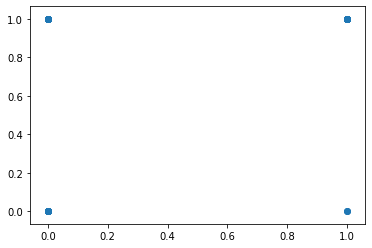

In [82]:
import matplotlib.pyplot as plt

plt.scatter(Lpredict,ytest)